In [2]:
import torch
import warnings
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from zipfile import ZipFile
from PIL import Image
import yaml
from pathlib import Path


with open("cfg.yaml", "r") as file:
        cfg = yaml.safe_load(file)

sys.path.append("src/")


torch.manual_seed(1)
warnings.filterwarnings("ignore")

print(f"cuda is available: {torch.cuda.is_available()}")
print(f"mps is available: {torch.backends.mps.is_available()}")

from function import coral
from net import VGG_Encoder, Decoder, Net
from train import train
from inference_generation import test_transform, style_transfer


cuda is available: False
mps is available: True


Test shapes: Encoder + Decoder separately

In [24]:
encoder = VGG_Encoder()
decoder = Decoder()
encoder.eval()
decoder.eval()
# net = Net(encoder, decoder)
# net.eval()
decoder.load_state_dict(torch.load(cfg["decoder"]))

original_image=torch.rand(1,3,256,256)
encoded = encoder(original_image)
encoded=encoded[-1]

output = decoder(encoded)
print(output.shape)

torch.Size([1, 3, 256, 256])


Initialize net

In [3]:
encoder = VGG_Encoder()
decoder = Decoder()
net=Net(encoder,decoder)

Test autoencoder (Net) shapes alltogether

In [ ]:
encoder = VGG_Encoder()
decoder = Decoder()
net=Net(encoder,decoder)
net.eval()
net.decoder.load_state_dict(torch.load(cfg["decoder"]))

original_image=torch.rand(1,3,256,256)
output = net(original_image)

Test training

In [3]:
train(net,cfg)

Using device: mps

  0%|          | 0/400 [00:00<?, ?it/s]

loss: 0.073698490858078

reproduced_image min: 0.5006628632545471 max: 0.5118871927261353

 12%|█▎        | 50/400 [01:01<03:35,  1.63it/s] 

loss: 0.04309340938925743

reproduced_image min: 0.1727863848209381 max: 0.9435930252075195

 25%|██▌       | 100/400 [01:32<03:08,  1.59it/s]

loss: 0.02893533930182457

reproduced_image min: 0.0975264236330986 max: 0.9986625909805298

 38%|███▊      | 150/400 [02:03<02:34,  1.62it/s]

loss: 0.018543977290391922

reproduced_image min: 0.0386643148958683 max: 0.9918631315231323

 50%|█████     | 200/400 [02:34<02:08,  1.56it/s]

loss: 0.017430711537599564

reproduced_image min: 0.03580234944820404 max: 0.9948587417602539

 62%|██████▎   | 250/400 [03:05<01:32,  1.63it/s]

loss: 0.012526500038802624

reproduced_image min: 0.012625722214579582 max: 0.9884522557258606

 75%|███████▌  | 300/400 [03:36<01:02,  1.61it/s]

loss: 0.012975740246474743

reproduced_image min: 0.014348902739584446 max: 0.9969801306724548

 88%|████████▊ | 350/400 [04:07<00:30,  1.61it/s]

loss: 0.008834891021251678

reproduced_image min: 0.03469573333859444 max: 0.9842028617858887

100%|██████████| 400/400 [04:38<00:00,  1.44it/s]
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x12187ef70>
Traceback (most recent call last):
  File "/Users/matteom/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/Users/matteom/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/matteom/miniconda3/envs/torch/lib/python3.9/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/Users/matteom/miniconda3/envs/torch/lib/python3.9/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/Users/matteom/miniconda3/envs/torch/lib/python3.9/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/Users/matteom/miniconda3/envs/tor

Test inference: just autoencoder: recreation of original image

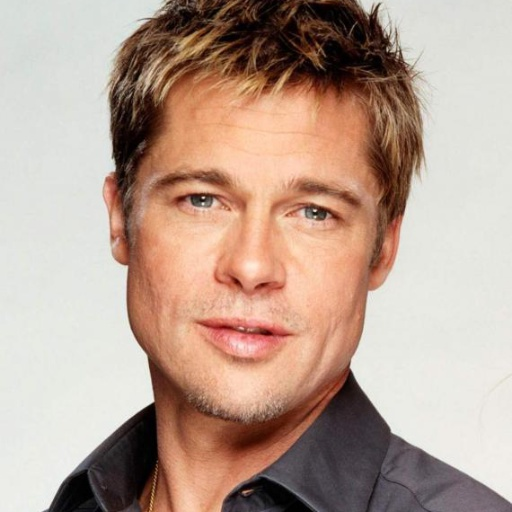

Input image shape: torch.Size([3, 512, 512])
Min: 0.0, Max: 1.0
Min: 0.4971317946910858, Max: 0.511238157749176


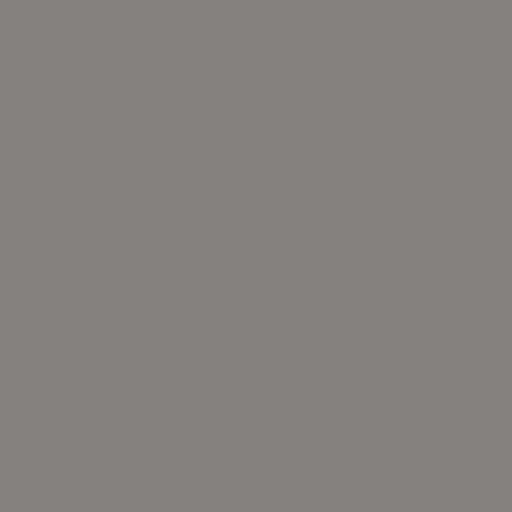

' input_tensor = input_tensor.to("cpu").unsqueeze(0)\n\nwith torch.no_grad():\n    encoded = encoder(input_tensor)[-1]\n    print(f"encoded input_tensor shape: {encoded.shape}")\n    output = decoder(encoded)\n    output=torch.squeeze(output)\n    #output=output.permute(1, 2, 0)\n    print(f"Output image shape: {output.shape}")\n    print(f"Min: {output.min().item()}, Max: {output.max().item()}")\n    PIL_transform = torchvision.transforms.ToPILImage()\n    output_img = PIL_transform(output)\n    #output_img = Image.fromtensor((output * 255).astype(np.uint8))\n    display(output_img) '

In [16]:
device = torch.device("cuda" if torch.cuda.is_available()
                else "mps" if torch.backends.mps.is_built() else "cpu")

input_img=Image.open("data/content_dir/brad_pitt.jpg")
display(input_img)
content_tf = test_transform(cfg["content_size"], cfg["crop"])
input_tensor = content_tf(Image.open(str("data/content_dir/brad_pitt.jpg")))
print(f"Input image shape: {input_tensor.shape}")
print(f"Min: {input_tensor.min().item()}, Max: {input_tensor.max().item()}")

encoder = VGG_Encoder()
decoder = Decoder()
net = Net(encoder, decoder)

decoder.load_state_dict(torch.load("model/model_storage/decoder_iter_300.pth.tar"))

input_tensor = input_tensor.to("cpu").unsqueeze(0)

with torch.no_grad():
    encoded = encoder(input_tensor)[-1]
    print(f"encoded input_tensor shape: {encoded.shape}")
    output = decoder(encoded)
    output=torch.squeeze(output)
    #output=output.permute(1, 2, 0)
    print(f"Output image shape: {output.shape}")
    print(f"Min: {output.min().item()}, Max: {output.max().item()}")
    PIL_transform = torchvision.transforms.ToPILImage()
    output_img = PIL_transform(output)
    #output_img = Image.fromtensor((output * 255).astype(np.uint8))
    display(output_img)

Advanced inference test on style transfer with AdaIN

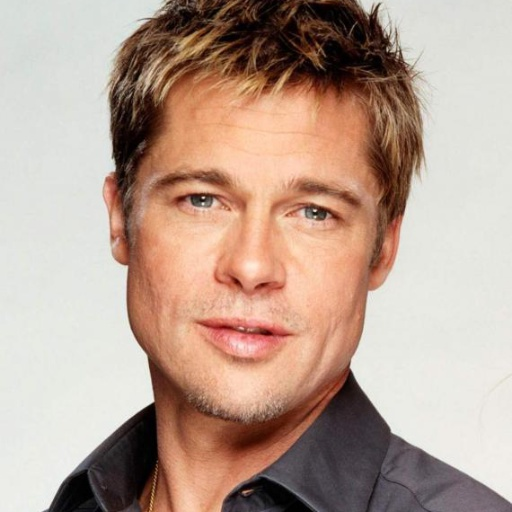

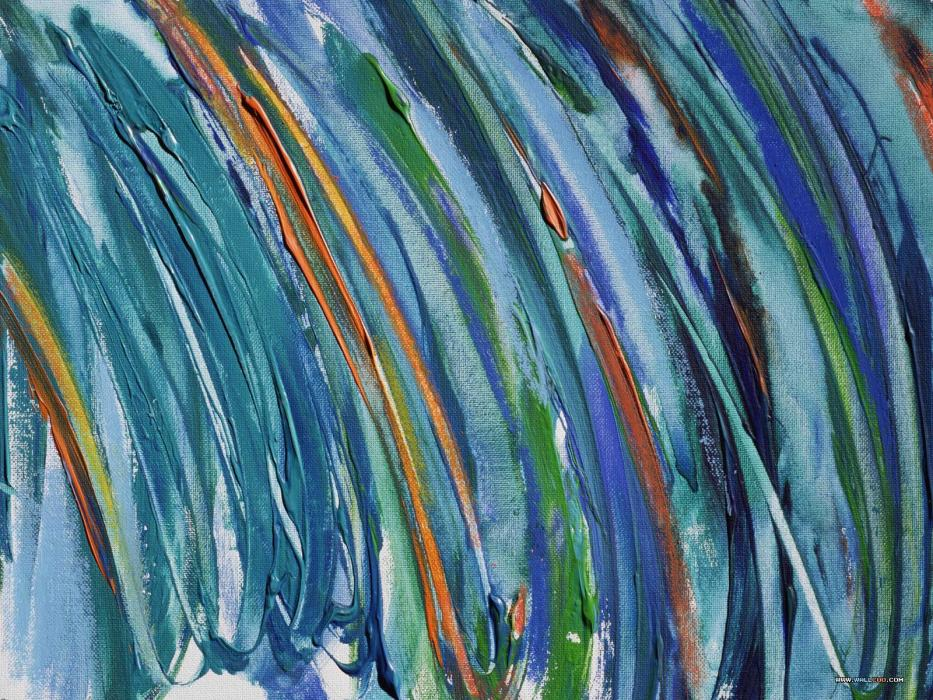

Preserving color


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([512, 512, 3])
tensor(-1.9397) tensor(-1.8353)
Normalized image shape: torch.Size([512, 512, 3])


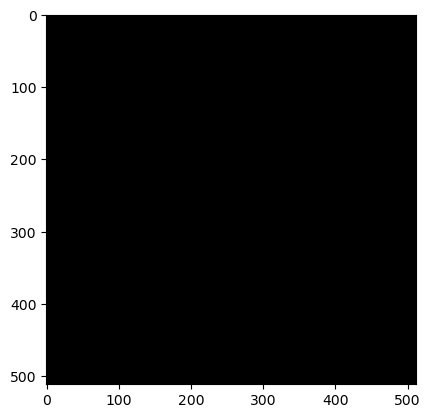

In [23]:
# This are the image and the style I want to mix
# --> Set their path in cfg.yaml
input_img=Image.open("data/content_dir/brad_pitt.jpg")
display(input_img)
style_ref=Image.open("data/style_dir/brushstrokes.jpg")
display(style_ref)

device = torch.device("cuda" if torch.cuda.is_available()
                else "mps" if torch.backends.mps.is_built() else "cpu")

output_dir = Path(cfg["output_dir"])
output_dir.mkdir(exist_ok=True, parents=True)

# Either --content or --contentDir should be given.
assert (cfg["content"] or cfg["content_dir"])
if cfg["content"]:
    content_paths = [Path(cfg["content"])]
else:
    content_dir = Path(cfg["content_dir"])
    content_paths = [f for f in content_dir.glob('*')]

# Either --style or --styleDir should be given.
assert (cfg["style"] or cfg["style_dir"])
if cfg["style"]:
    style_paths = cfg["style"].split(',')
    if len(style_paths) == 1:
        style_paths = [Path(cfg["style"])]
    else:
        do_interpolation = True
        assert (cfg["style_interpolation_weights"] != ''), \
            'Please specify interpolation weights'
        weights = [int(i) for i in cfg["style_interpolation_weights"].split(',')]
        interpolation_weights = [w / sum(weights) for w in weights]
else:
    style_dir = Path(cfg["style_dir"])
    style_paths = [f for f in style_dir.glob('*')]

encoder = VGG_Encoder()
decoder = Decoder()

decoder.eval()
encoder.eval()

decoder.load_state_dict(torch.load(cfg["decoder"]))
# encoder.load_state_dict(torch.load(args.vgg))
#vgg = nn.Sequential(*list(vgg.children())[:31])

encoder.to(device)
decoder.to(device)

content_tf = test_transform(cfg["content_size"], cfg["crop"])
style_tf = test_transform(cfg["style_size"], cfg["crop"])

do_interpolation = False

for content_path in content_paths:

    # |||||||
    # not in use
    # |||||||
    # vvvvvvv
    if do_interpolation:  # one content image, N style image
        style = torch.stack([style_tf(Image.open(str(p))) for p in style_paths])
        content = content_tf(Image.open(str(content_path))) \
            .unsqueeze(0).expand_as(style)
        style = style.to(device)
        content = content.to(device)
        with torch.no_grad():
            output = style_transfer(encoder, decoder, content, style,
                                    cfg["alpha"], interpolation_weights)
        output = output.cpu()
        output_name = output_dir / '{:s}_interpolation{:s}'.format(
            content_path.stem, cfg["save_ext"])
        torchvision.utils.save_image(output, str(output_name))
    # ^^^^^^^
    # |||||||
    # not in use
    # |||||||
        

    else:  # process one content and one style
        for style_path in style_paths:
            content = content_tf(Image.open(str(content_path)))
            style = style_tf(Image.open(str(style_path)))
            if cfg["preserve_color"]:
                print('Preserving color')
                style = coral(style, content)
            style = style.to(device).unsqueeze(0)
            content = content.to(device).unsqueeze(0)
            with torch.no_grad():
                output = style_transfer(encoder, decoder, content, style,
                                        cfg["alpha"])
                
            output = output[0].cpu()
            mean = [0.485, 0.456, 0.406]  # ImageNet mean
            std = [0.229, 0.224, 0.225]   # ImageNet standard deviation
            transform = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(),  # Convert the image to a PyTorch tensor
                torchvision.transforms.Normalize(mean, std)  # Normalize with mean and standard deviation
            ])
            output=output.permute(1, 2, 0)
            print(output.shape)
            normalized_image = transform(np.array(output))
            print(normalized_image.min(), normalized_image.max())
            normalized_image=normalized_image.permute(1, 2, 0)

            output_name = output_dir / '{:s}_stylized_{:s}{:s}'.format(
                content_path.stem, style_path.stem, cfg["save_ext"])
            
            #torchvision.utils.save_image(output, str(output_name))
            print(f"Normalized image shape: {normalized_image.shape}")
            plt.imshow(normalized_image)
            plt.show()


#output_image=Image.open("data/output_dir/brad_pitt_stylized_brushstrokes.jpg")
#display(output_image)


